## Zernike Polynomials and 2D functions

In [124]:
from IPython.display import HTML
# http://blog.nextgenetics.net/?e=102
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
%matplotlib notebook
import zernike as z
import matplotlib.pyplot as plt

### The Zernike "Pascal Triangle"

First, we plot several of the 2D functions

$R_n^m(r) \cos m\theta$

$R_n^m(r) \sin m\theta$

$n-m$ must be even

#### References
$^1$https://en.wikipedia.org/wiki/Zernike_polynomials

$^2$Noll, R. J. (1976). "Zernike polynomials and atmospheric turbulence". J. Opt. Soc. Am. 66 (3): 207. Bibcode:1976JOSA...66..207N. [doi:10.1364/JOSA.66.000207](https://dx.doi.org/10.1016%2FS0031-8914%2834%2980259-5).



In [120]:
reload(z)
g = z.graph(nmax=5)
plt.figure()
plt.imshow(g,origin='lower',interpolation='nearest',cmap='Greys')

<IPython.core.display.Javascript object>

Now we print the Noll n,m in the Pascal Triangle layout

In [150]:
nmax = 9
ztab = sorted(z.ztable(((nmax+1)*(nmax+2))/2,noll=True))
nlast = -1
first = True
for n,m in ztab:
    if n != nlast:
        if not first: print ''
        print '   '*(nmax-n),
    print '(%d,%d)'%(n,m),
    nlast = n
    first = False

                            (0,0) 
                         (1,-1) (1,1) 
                      (2,-2) (2,0) (2,2) 
                   (3,-3) (3,-1) (3,1) (3,3) 
                (4,-4) (4,-2) (4,0) (4,2) (4,4) 
             (5,-5) (5,-3) (5,-1) (5,1) (5,3) (5,5) 
          (6,-6) (6,-4) (6,-2) (6,0) (6,2) (6,4) (6,6) 
       (7,-7) (7,-5) (7,-3) (7,-1) (7,1) (7,3) (7,5) (7,7) 
    (8,-8) (8,-6) (8,-4) (8,-2) (8,0) (8,2) (8,4) (8,6) (8,8) 
 (9,-9) (9,-7) (9,-5) (9,-3) (9,-1) (9,1) (9,3) (9,5) (9,7) (9,9)


### Zernike 1D polynomials

$$R_n^m(r) = \sum_{k=0}^{(n-m)/2} \frac{(-1)^k(n-k)!}{k!\,(\frac{n+m}{2}-k)!\,(\frac{n-m}{2}-k)!}\,r^{n-2k}$$

$R_{0}^{0}(r) = 1$

$R_{1}^{1}(r) = r$

$R_{2}^{0}(r) = 2r^{2}-1$

$R_{2}^{2}(r) = r^{2}$

$R_{3}^{1}(r) = 3r^{3}-2r$

$R_{3}^{3}(r) = r^{3}$

$R_{4}^{0}(r) = 6r^{4}-6r^{2}+1$

$R_{4}^{2}(r) = 4r^{4}-3r^{2}$

$R_{4}^{4}(r) = r^{4}$

$R_{5}^{1}(r) = 10r^{5}-12r^{3}+3r$

$R_{5}^{3}(r) = 5r^{5}-4r^{3}$

$R_{5}^{5}(r) = r^{5}$

$R_{6}^{0}(r) = 20r^{6}-30r^{4}+12r^{2}-1$

$R_{6}^{2}(r) = 15r^{6}-20r^{4}+6r^{2}$

$R_{6}^{4}(r) = 6r^{6}-5r^{4}$

$R_{6}^{6}(r) = r^{6}$

In [134]:
reload(z)
nmax = 6
ztab = sorted(z.ztable(((nmax+1)*(nmax+2))/2,noll=True))
debug = False
latex = False
printit = False
strlist = []
for n,m in ztab:
    if m>=0:
        cs = sorted(z.rnm_coefs(n,m),reverse=True)
        poly = 'R%d%d(r) = '%(n,m)
        lpoly = 'R_{%d}^{%d}(r) = '%(n,m)
        if debug:
            for p,c in cs:
                poly += '(%d,%d)'%(c,p)
        else:
            first = True
            for p,c in cs:
                if not first and c>0:
                    poly += ' + '
                    lpoly += '+'
                if not first and c<0:
                    poly += ' - '
                    lpoly += '-'
                if (c!=1 or n==0 or p==0):
                    poly += '%d'%abs(c)
                    lpoly += '%d'%abs(c)
                first = False
                if (p>0):
                    poly += 'r'
                    lpoly += 'r'
                if (p>1):
                    poly += '^%d'%p
                    lpoly += '^{%d}'%p
        if latex:
            strlist.append('$'+lpoly+'$' )
        else:
            strlist.append(poly)
if printit:
    for s in strlist: print s

.

.

.

.

# An example of a 2D Zernike function

<IPython.core.display.Javascript object>


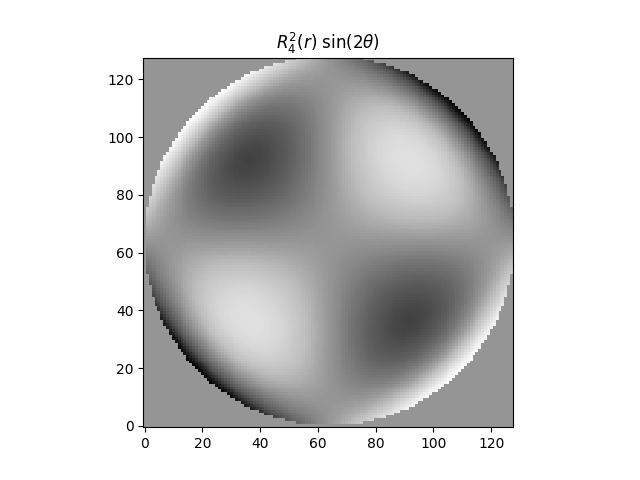

In [144]:
import img
N = 128
n,m = 4,-2
g = z.zernike2(N,N,N/2,n,m)
ap = img.circle((N,N),r=N/2)
#plt.figure()
plt.imshow(g*ap,origin='lower',interpolation='nearest',cmap='Greys')
if m<0:
    trig = r'$\sin(%d\theta)$'%(-m)
elif m>0:
    trig = r'$\cos(%d\theta)$'%m
else:
    trig = ''
title = r'$R_{%d}^{%d}(r)$ '%(n,abs(m))
title += trig
plt.title(title);